In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
mkdir CNN

In [3]:
%cd /content/drive/MyDrive/CNN

/content/drive/MyDrive/CNN


In [4]:
import os
# os.environ['KAGGLE_USERNAME'] = "nandhakumar5321" # username from the json file
# os.environ['KAGGLE_KEY'] = "cd3f45b0f739ad624b963b7c66bce959" # key from the json file
# !kaggle datasets download -d sachinkumar413/monkeypox-images-dataset # api copied from kaggle

In [5]:
from zipfile import ZipFile

file_name = "/content/drive/MyDrive/CNN/archive (4).zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [7]:
# Make new base directory
original_dataset_dir = '/content/drive/MyDrive/CNN/'
base_dir = '/content/drive/MyDrive/CNN/data'
os.mkdir(base_dir)

In [8]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)


train_helmet_dir = os.path.join(train_dir, 'Helmet')
os.mkdir(train_helmet_dir)

train_non-helmet_dir = os.path.join(train_dir, 'non-helmet')
os.mkdir(train_non-helmet_dir)

train_triples_dir = os.path.join(train_dir, 'Triples')
os.mkdir(train_triples_dir)

train_License-plate_dir = os.path.join(train_dir, 'License-plate')
os.mkdir(train_License-plate_dir)

train_person_dir = os.path.join(train_dir, 'person')
os.mkdir(train_person_dir)






In [9]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [10]:
HELMET_SOURCE_DIR = '/content/drive/MyDrive/CNN/dataset/HELMET/'
TRAINING_HELMET_DIR = '/content/drive/MyDrive/CNN/data/train/HELMET/'
VALID_HELMET_DIR = '/content/drive/MyDrive/CNN/data/validation/HELMET/'

NON-HELMET_SOURCE_DIR = '/content/drive/MyDrive/CNN/dataset/NON-HELMET/'
TRAINING_NON-HELMET_DIR = '/content/drive/MyDrive/CNN/data/train/NON-HELMET/'
VALID_NON-HELMET_DIR = '/content/drive/MyDrive/CNN/data/validation/NON-HELMET/'

TRIPLES_SOURCE_DIR = '/content/drive/MyDrive/CNN/dataset/TRIPLES/'
TRAINING_TRIPLES_DIR = '/content/drive/MyDrive/CNN/data/train/TRIPLES/'
VALID_TRIPLES_DIR = '/content/drive/MyDrive/CNN/data/validation/TRIPLES/'

LICENSE-PLATE_SOURCE_DIR = '/content/drive/MyDrive/CNN/dataset/LICENSE-PLATE/'
TRAINING_LICENSE-PLATE_DIR = '/content/drive/MyDrive/CNN/data/train/LICENSE-PLATE/'
VALID_LICENSE-PLATE_DIR = '/content/drive/MyDrive/CNN/data/validation/LICENSE-PLATE/'

PERSON_SOURCE_DIR = '/content/drive/MyDrive/CNN/dataset/PERSON/'
TRAINING_PERSON_DIR = '/content/drive/MyDrive/CNN/data/train/PERSON/'
VALID_PERSON_DIR = '/content/drive/MyDrive/CNN/data/validation/PERSON/'



In [11]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(HELMET_SOURCE_DIR, TRAINING_HELMET_DIR, VALID_HELMET_DIR, split_size)
split_data(NON-HELMET_SOURCE_DIR, TRAINING_NON-HELMET_DIR, VALID_NON-HELMET_DIR, split_size)
split_data(TRIPLES_SOURCE_DIR, TRAINING_TRIPLES_DIR, VALID_TRIPLES_DIR, split_size)
split_data(LICENSE-PLATE_SOURCE_DIR, TRAINING_LICENSE-PLATE_DIR, VALID_LICENSE-PLATE_DIR, split_size)
split_data(PERSON_SOURCE_DIR, TRAINING_PERSON_DIR, VALID_PERSON_DIR, split_size)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

image_folder = ['Helmet', 'Non-Helmet', 'Triples', 'Licens-plate', 'Person']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/CNN/data/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in ['helmet', 'non-helmet', 'triples', 'license-plate', 'person']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/CNN/data/train/'+i+'/'))))

In [ ]:
image_folder = ['helmet', 'non-helmet', 'triples', 'license-plate', 'person']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/drive/MyDrive/CNN/data/validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [ ]:
for i in ['helmet', 'non-helmet', 'triples', 'license-plate', 'plate']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/content/drive/MyDrive/CNN/data/validation/'+i+'/'))))

In [17]:
img_width=416; img_height=416
batch_size=32

In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/CNN/data/train'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))

In [ ]:
VALIDATION_DIR = '/content/drive/MyDrive/CNN/data/validation'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )

In [20]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/drive/MyDrive/CNN/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [22]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [23]:
history = model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks = [best_model]
                              )

Epoch 1/30
1103/1103 [==============================] - ETA: 0s - loss: 1.3927 - accuracy: 0.4502

1103/1103 [==============================] - 597s 528ms/step - loss: 1.3927 - accuracy: 0.4502 - val_loss: 1.2879 - val_accuracy: 0.5132
Epoch 2/30
1103/1103 [==============================] - ETA: 0s - loss: 1.1899 - accuracy: 0.5273

1103/1103 [==============================] - 576s 522ms/step - loss: 1.1899 - accuracy: 0.5273 - val_loss: 1.1405 - val_accuracy: 0.5605
Epoch 3/30
1103/1103 [==============================] - ETA: 0s - loss: 1.0762 - accuracy: 0.5788

1103/1103 [==============================] - 572s 518ms/step - loss: 1.0762 - accuracy: 0.5788 - val_loss: 0.9572 - val_accuracy: 0.6415
Epoch 4/30
1103/1103 [==============================] - ETA: 0s - loss: 0.9437 - accuracy: 0.6363

1103/1103 [==============================] - 576s 523ms/step - loss: 0.9437 - accuracy: 0.6363 - val_loss: 0.8480 - val_accuracy: 0.6724
Epoch 5/30
1103/1103 [==============================] - ETA: 0s - loss: 0.8402 - accuracy: 0.6765

1103/1103 [==============================] - 574s 521ms/step - loss: 0.8402 - accuracy: 0.6765 - val_loss: 0.7350 - val_accuracy: 0.7176
Epoch 6/30
1103/1103 [==============================] - ETA: 0s - loss: 0.7377 - accuracy: 0.7196

1103/1103 [==============================] - 571s 518ms/step - loss: 0.7377 - accuracy: 0.7196 - val_loss: 0.5859 - val_accuracy: 0.7791
Epoch 7/30
1103/1103 [==============================] - ETA: 0s - loss: 0.6544 - accuracy: 0.7545

1103/1103 [==============================] - 573s 519ms/step - loss: 0.6544 - accuracy: 0.7545 - val_loss: 0.5136 - val_accuracy: 0.8131
Epoch 8/30
1103/1103 [==============================] - ETA: 0s - loss: 0.5862 - accuracy: 0.7804

1103/1103 [==============================] - 568s 515ms/step - loss: 0.5862 - accuracy: 0.7804 - val_loss: 0.4641 - val_accuracy: 0.8383
Epoch 9/30
1103/1103 [==============================] - ETA: 0s - loss: 0.5176 - accuracy: 0.8091

1103/1103 [==============================] - 570s 517ms/step - loss: 0.5176 - accuracy: 0.8091 - val_loss: 0.3790 - val_accuracy: 0.8738
Epoch 10/30
1103/1103 [==============================] - ETA: 0s - loss: 0.4743 - accuracy: 0.8255

1103/1103 [==============================] - 571s 517ms/step - loss: 0.4743 - accuracy: 0.8255 - val_loss: 0.3320 - val_accuracy: 0.8815
Epoch 11/30
1103/1103 [==============================] - ETA: 0s - loss: 0.4297 - accuracy: 0.8456

1103/1103 [==============================] - 573s 519ms/step - loss: 0.4297 - accuracy: 0.8456 - val_loss: 0.3487 - val_accuracy: 0.8738
Epoch 12/30
1103/1103 [==============================] - ETA: 0s - loss: 0.3946 - accuracy: 0.8599

1103/1103 [==============================] - 574s 520ms/step - loss: 0.3946 - accuracy: 0.8599 - val_loss: 0.2796 - val_accuracy: 0.9077
Epoch 13/30
1103/1103 [==============================] - ETA: 0s - loss: 0.3746 - accuracy: 0.8671

1103/1103 [==============================] - 578s 524ms/step - loss: 0.3746 - accuracy: 0.8671 - val_loss: 0.2344 - val_accuracy: 0.9242
Epoch 14/30
1103/1103 [==============================] - ETA: 0s - loss: 0.3457 - accuracy: 0.8789

1103/1103 [==============================] - 578s 524ms/step - loss: 0.3457 - accuracy: 0.8789 - val_loss: 0.2178 - val_accuracy: 0.9247
Epoch 15/30
1103/1103 [==============================] - ETA: 0s - loss: 0.3251 - accuracy: 0.8855

1103/1103 [==============================] - 577s 523ms/step - loss: 0.3251 - accuracy: 0.8855 - val_loss: 0.1877 - val_accuracy: 0.9427
Epoch 16/30
1103/1103 [==============================] - ETA: 0s - loss: 0.3092 - accuracy: 0.8945

1103/1103 [==============================] - 575s 522ms/step - loss: 0.3092 - accuracy: 0.8945 - val_loss: 0.2203 - val_accuracy: 0.9294
Epoch 17/30
1103/1103 [==============================] - ETA: 0s - loss: 0.2980 - accuracy: 0.8982

1103/1103 [==============================] - 570s 517ms/step - loss: 0.2980 - accuracy: 0.8982 - val_loss: 0.2189 - val_accuracy: 0.9302
Epoch 18/30
1103/1103 [==============================] - ETA: 0s - loss: 0.2926 - accuracy: 0.8989

1103/1103 [==============================] - 580s 526ms/step - loss: 0.2926 - accuracy: 0.8989 - val_loss: 0.2111 - val_accuracy: 0.9342
Epoch 19/30
1103/1103 [==============================] - ETA: 0s - loss: 0.2733 - accuracy: 0.9052

1103/1103 [==============================] - 575s 521ms/step - loss: 0.2733 - accuracy: 0.9052 - val_loss: 0.2060 - val_accuracy: 0.9298
Epoch 20/30
1103/1103 [==============================] - ETA: 0s - loss: 0.2648 - accuracy: 0.9099

1103/1103 [==============================] - 570s 517ms/step - loss: 0.2648 - accuracy: 0.9099 - val_loss: 0.1697 - val_accuracy: 0.9470
Epoch 21/30
1103/1103 [==============================] - ETA: 0s - loss: 0.2464 - accuracy: 0.9156

1103/1103 [==============================] - 568s 515ms/step - loss: 0.2464 - accuracy: 0.9156 - val_loss: 0.2292 - val_accuracy: 0.9322
Epoch 22/30
1103/1103 [==============================] - ETA: 0s - loss: 0.2520 - accuracy: 0.9141

1103/1103 [==============================] - 569s 516ms/step - loss: 0.2520 - accuracy: 0.9141 - val_loss: 0.1517 - val_accuracy: 0.9558
Epoch 23/30
1103/1103 [==============================] - ETA: 0s - loss: 0.2450 - accuracy: 0.9184

1103/1103 [==============================] - 566s 513ms/step - loss: 0.2450 - accuracy: 0.9184 - val_loss: 0.1857 - val_accuracy: 0.9406
Epoch 24/30
1103/1103 [==============================] - ETA: 0s - loss: 0.2338 - accuracy: 0.9210

1103/1103 [==============================] - 563s 511ms/step - loss: 0.2338 - accuracy: 0.9210 - val_loss: 0.1360 - val_accuracy: 0.9595
Epoch 25/30
1103/1103 [==============================] - ETA: 0s - loss: 0.2334 - accuracy: 0.9215

1103/1103 [==============================] - 567s 514ms/step - loss: 0.2334 - accuracy: 0.9215 - val_loss: 0.1629 - val_accuracy: 0.9472
Epoch 26/30
1103/1103 [==============================] - ETA: 0s - loss: 0.2158 - accuracy: 0.9273

1103/1103 [==============================] - 569s 516ms/step - loss: 0.2158 - accuracy: 0.9273 - val_loss: 0.1286 - val_accuracy: 0.9594
Epoch 27/30
1103/1103 [==============================] - ETA: 0s - loss: 0.2186 - accuracy: 0.9284

1103/1103 [==============================] - 568s 515ms/step - loss: 0.2186 - accuracy: 0.9284 - val_loss: 0.1322 - val_accuracy: 0.9619
Epoch 28/30
1103/1103 [==============================] - ETA: 0s - loss: 0.2216 - accuracy: 0.9242

1103/1103 [==============================] - 569s 516ms/step - loss: 0.2216 - accuracy: 0.9242 - val_loss: 0.1399 - val_accuracy: 0.9552
Epoch 29/30
1103/1103 [==============================] - ETA: 0s - loss: 0.1994 - accuracy: 0.9357

1103/1103 [==============================] - 566s 513ms/step - loss: 0.1994 - accuracy: 0.9357 - val_loss: 0.1216 - val_accuracy: 0.9650
Epoch 30/30
1103/1103 [==============================] - ETA: 0s - loss: 0.2010 - accuracy: 0.9305

1103/1103 [==============================] - 563s 511ms/step - loss: 0.2010 - accuracy: 0.9305 - val_loss: 0.1483 - val_accuracy: 0.9555


In [25]:
model.save('/content/drive/MyDrive/CNN/dest.h5')

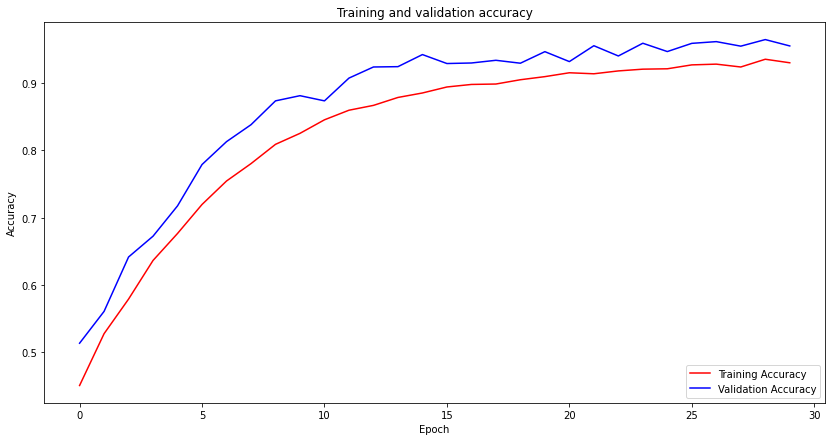

In [26]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

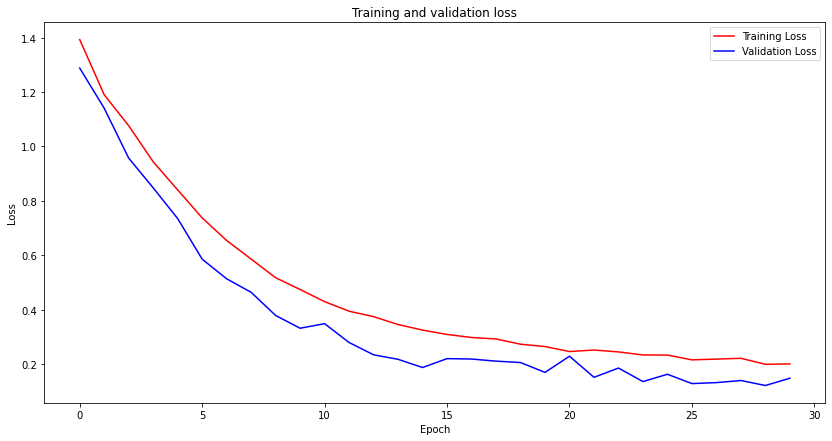

In [27]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
model.save('model.h5')